# Problem Statement:

## From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
#### Dataset : https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Skewness Treatment

In [7]:
fitted_data, fitted_lambda = stats.boxcox(df['SepalLengthCm'])

In [8]:
fitted_data = fitted_data.reshape(150,-1)
df['SepalLengthCm'] = fitted_data

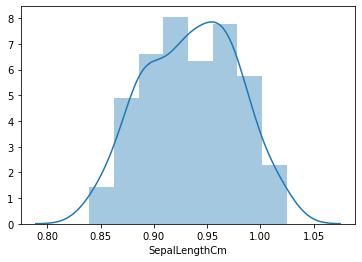

In [9]:
sns.distplot(np.log1p(df['SepalLengthCm']))

In [10]:
df['SepalLengthCm'] = np.log1p(df['SepalLengthCm'])

In [11]:
fitted_data, fitted_lambda = stats.boxcox(df['SepalWidthCm'])

In [12]:
fitted_data = fitted_data.reshape(150,-1)
df['SepalWidthCm'] = fitted_data

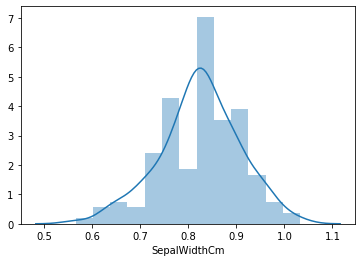

In [13]:
sns.distplot(np.log1p(df['SepalWidthCm']))

In [14]:
df['SepalWidthCm'] = np.log1p(df['SepalWidthCm'])

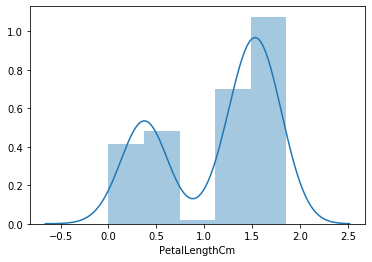

In [15]:
fitted_data, fitted_lambda = stats.boxcox(df['PetalLengthCm'])
fitted_data = fitted_data.reshape(150,-1)
df['PetalLengthCm'] = fitted_data
df['PetalLengthCm'] = np.log1p(df['PetalLengthCm'])
sns.distplot(df['PetalLengthCm'])

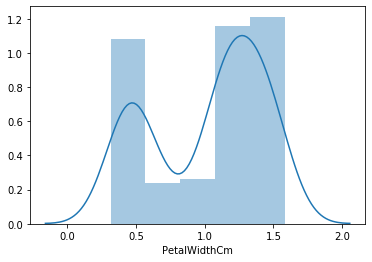

In [16]:
df['PetalWidthCm']=np.sqrt(df['PetalWidthCm'])
sns.distplot(df['PetalWidthCm'])

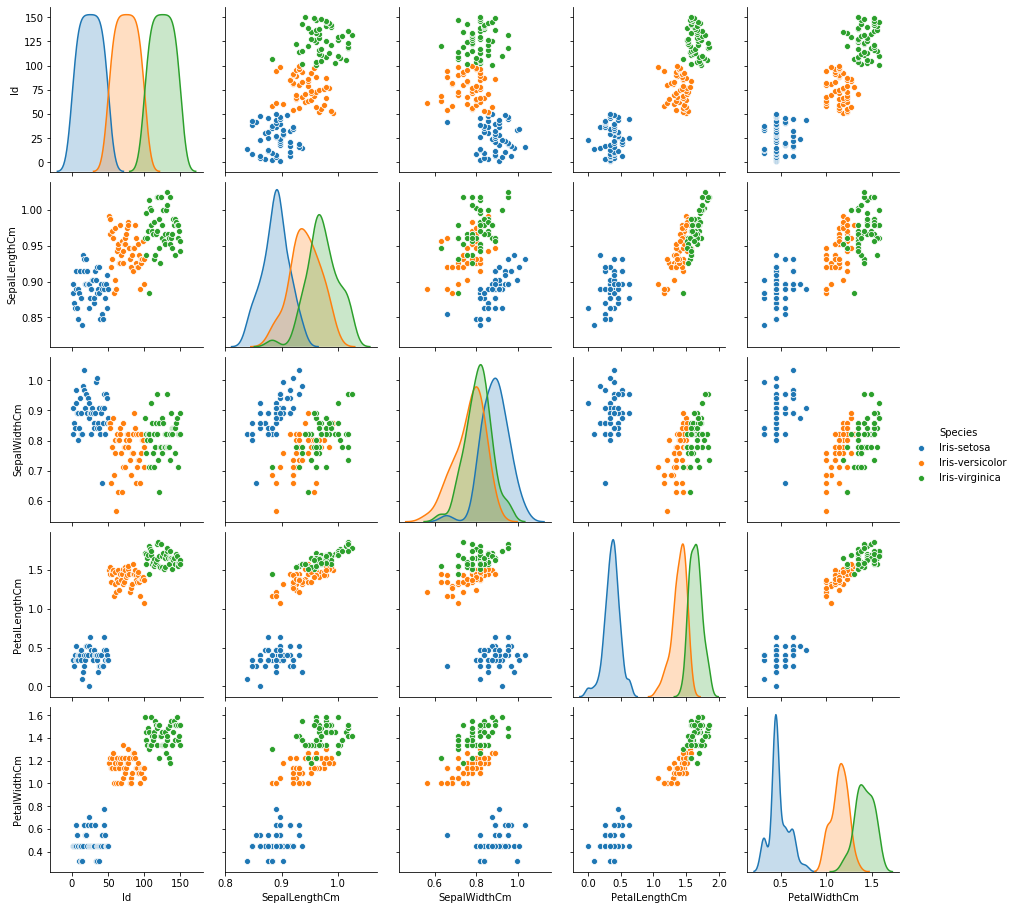

In [17]:
sns.pairplot(df,hue='Species')

# Inference
1. We can observe most of the quantities exhibit positive correlation.
2. However, SepalLength and SepalWidth show no particular relation between them, we can infer that they are independent of each other.

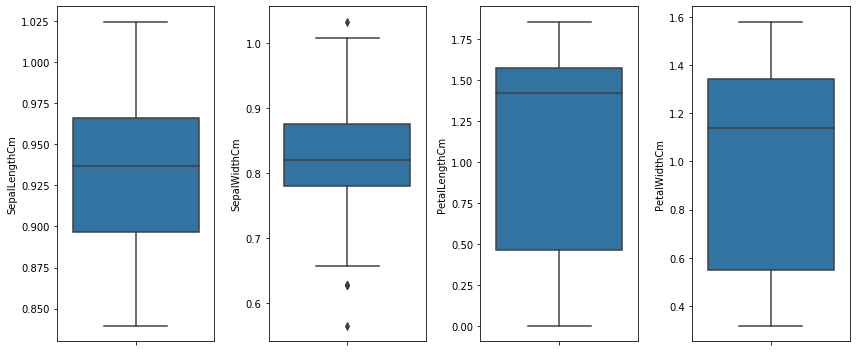

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,4,1)
sns.boxplot(df['SepalLengthCm'],orient='v')
plt.subplot(1,4,2)
sns.boxplot(df['SepalWidthCm'],orient='v')
plt.subplot(1,4,3)
sns.boxplot(df['PetalLengthCm'],orient='v')
plt.subplot(1,4,4)
sns.boxplot(df['PetalWidthCm'],orient='v')
plt.tight_layout()

# Inference
1. We can observe few outliers in the SepalWidth.
2. The mean of all the features have been made close to 0, to achieve standardisation since Kmeans clustering is an distance dependent approach.

In [19]:
new_df=df.drop(['Id','Species'],axis=1)

In [20]:
new_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.896650,0.909260,0.333006,0.447214
1,0.883638,0.821011,0.333006,0.447214
2,0.869818,0.858475,0.260204,0.447214
3,0.862578,0.840141,0.400544,0.447214
4,0.890240,0.924944,0.333006,0.447214


In [21]:
from sklearn.cluster import KMeans

In [22]:
SSE_scaled=[]
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(new_df)
    SSE_scaled.append(kmeans.inertia_)

Text(0.5, 1.0, 'ELBOW PLOT')

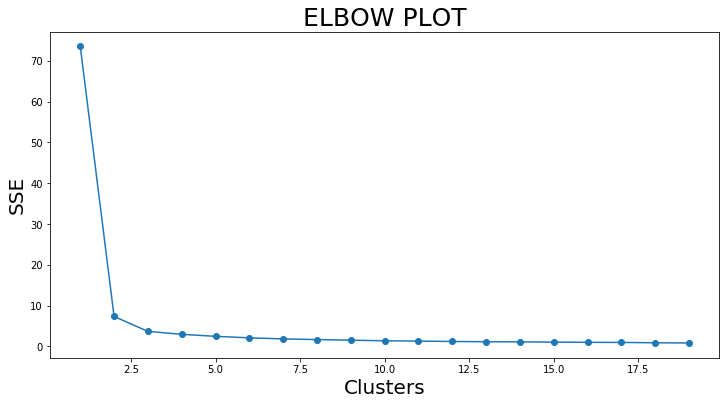

In [23]:
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE_scaled})
plt.plot(frame_scaled['Cluster'], frame_scaled['SSE'], marker='o')
plt.xlabel("Clusters",fontsize=20)
plt.ylabel("SSE",fontsize=20) #Cluster Sum-of-Squares
plt.title("ELBOW PLOT",fontsize=25)

# Inference
1. We can clearly observe from the elbow plot that after cluster=3(approx) the plot shows a change in its initial trajectory.
2. As per the graph we can consider k=3 to be our ideal choice for this particular problem.

In [24]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3)
kmeans.fit(new_df)
predict_clusters = kmeans.predict(new_df)

In [25]:
df['Cluster_No'] = predict_clusters

In [26]:
df[['Species','Cluster_No']]

,Species,Cluster_No
0,Iris-setosa,1
1,Iris-setosa,1
2,Iris-setosa,1
3,Iris-setosa,1
4,Iris-setosa,1
...,...,...
145,Iris-virginica,2
146,Iris-virginica,2
147,Iris-virginica,2
148,Iris-virginica,2


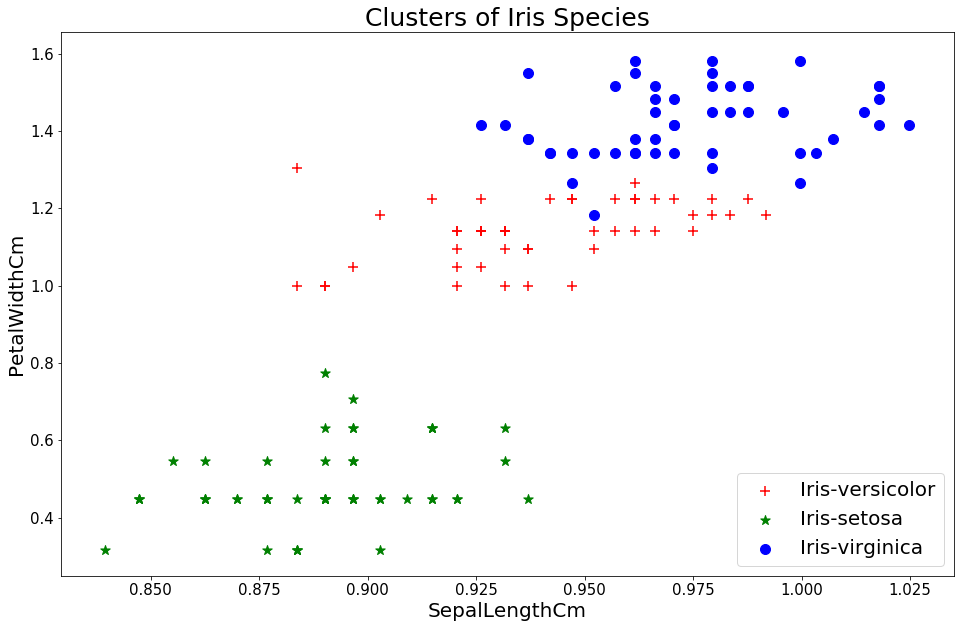

In [27]:
    
    plt.figure(figsize=(16,10))


    plt.scatter(x=df[df['Cluster_No']==0]['SepalLengthCm'],y=df[df['Cluster_No']==0]['PetalWidthCm'],s=100,c='r',marker='+',label='Iris-versicolor')

    plt.scatter(x=df[df['Cluster_No']==1]['SepalLengthCm'],y=df[df['Cluster_No']==1]['PetalWidthCm'],s=100,c='g',marker='*',label='Iris-setosa')

    plt.scatter(x=df[df['Cluster_No']==2]['SepalLengthCm'],y=df[df['Cluster_No']==2]['PetalWidthCm'],s=100,c='b',marker='o',label='Iris-virginica')

    plt.title('Clusters of Iris Species',fontsize=25)
    plt.xlabel('SepalLengthCm',fontsize=20)
    plt.ylabel('PetalWidthCm',fontsize=20)
    plt.legend(loc='lower right',fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()

# Let's upload the data in server and visualise the results!
http://127.0.0.1:8050/

In [28]:
input_sheet={}    
def parse_contents(contents,filename):
    content_type, content_string = contents.split(',')
    
    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            # Assume that the user uploaded a CSV file
            df = pd.read_csv(
                io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            # Assume that the user uploaded an excel file
            df = pd.read_excel(io.BytesIO(decoded))
    except Exception as e:
        print(e)
        
        return html.Div([
            'There was an error processing this file.'
        ])
    if filename == 'Iris.csv':
        input_sheet['iris_data'] = df   
    newdf=df    
    return html.Div([
        dbc.Table.from_dataframe(newdf, striped=True, bordered=True, hover=True,dark=True),
        html.Hr(),  # horizontal line
    ])

In [ ]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash_table.Format import Format, Group, Scheme, Symbol
import dash_bootstrap_components as dbc
import plotly.express as px
from plotly.tools import mpl_to_plotly

image_bg = 'C://Users//sudar//OneDrive//Desktop//Work Files//TSF//Clustering//assets//bg.jpg'
encoded_bg = base64.b64encode(open(image_bg, 'rb').read())


app = dash.Dash(external_stylesheets=[dbc.themes.SLATE])
colors = {'background': '#01151a','text': '#beeefa'}

app.layout = html.Div([
             html.H3("Upload Iris Dataset",className='title'),
             dcc.Upload(
             id='iris-data',
             children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
            ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded
        multiple=False
    ),
    html.Div(id='output-data-upload-1'),
    #Button
    html.H3("Generate Clusters"),
    
    dbc.Button("Submit", id='submit-val',color="success",className="mr-3",size="lg",block=True),
    html.Div(id='output-data-upload-2',
             children='Enter a value and press submit'),
    html.Div( children=[
    html.Img(className='bg',src='data:image/png;base64,{}'.format(encoded_bg.decode())) ])
    ])


#Display Datasheet
@app.callback(Output('output-data-upload-1', 'children'),
              [Input('iris-data', 'contents')],[State('iris-data', 'filename')])
def update_output(list_of_contents,filename):
    if list_of_contents is not None:
        children = [parse_contents(list_of_contents,filename)]
        return children
#===================================================================================================#    

@app.callback(Output('output-data-upload-2','children'),
            [Input('submit-val', 'n_clicks')])
#              [State('input-on-submit', 'value')])

def update_datatable(n_clicks): 
    if n_clicks:
        fitted_data, fitted_lambda = stats.boxcox(input_sheet['iris_data']['SepalLengthCm'])
        fitted_data = fitted_data.reshape(150,-1)
        input_sheet['iris_data']['SepalLengthCm'] = fitted_data
        input_sheet['iris_data']['SepalLengthCm'] = np.log1p(input_sheet['iris_data']['SepalLengthCm'])

        fitted_data, fitted_lambda = stats.boxcox(input_sheet['iris_data']['SepalWidthCm'])
        fitted_data = fitted_data.reshape(150,-1)
        input_sheet['iris_data']['SepalWidthCm'] = fitted_data
        input_sheet['iris_data']['SepalWidthCm'] = np.log1p(input_sheet['iris_data']['SepalWidthCm'])

        fitted_data, fitted_lambda = stats.boxcox(input_sheet['iris_data']['PetalLengthCm'])
        fitted_data = fitted_data.reshape(150,-1)
        input_sheet['iris_data']['PetalLengthCm'] = fitted_data
        input_sheet['iris_data']['PetalLengthCm'] = np.log1p(input_sheet['iris_data']['PetalLengthCm'])

        input_sheet['iris_data']['PetalWidthCm']=np.sqrt(input_sheet['iris_data']['PetalWidthCm'])

        new_df=input_sheet['iris_data'].drop(['Id','Species'],axis=1)

        kmeans = KMeans(n_jobs = -1, n_clusters = 3)
        kmeans.fit(new_df)
        predict_clusters = kmeans.predict(new_df)

        df['Cluster_No'] = predict_clusters

        fig=plt.figure(figsize=(16,10))


        fig=plt.scatter(x=df[df['Cluster_No']==0]['SepalLengthCm'],y=df[df['Cluster_No']==0]['PetalWidthCm'],s=100,c='r',marker='+',label='Iris-versicolor')

        fig=plt.scatter(x=df[df['Cluster_No']==1]['SepalLengthCm'],y=df[df['Cluster_No']==1]['PetalWidthCm'],s=100,c='g',marker='*',label='Iris-versicolor')

        fig=plt.scatter(x=df[df['Cluster_No']==2]['SepalLengthCm'],y=df[df['Cluster_No']==2]['PetalWidthCm'],s=100,c='b',marker='o',label='Iris-versicolor')

        plt.title('Clusters of Iris Species',fontsize=25)
        plt.xlabel('SepalLengthCm',fontsize=20)
        plt.ylabel('PetalWidthCm',fontsize=20)
        plt.legend(loc='lower right',fontsize=20)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        
        pic_IObytes = io.BytesIO()
        plt.savefig(pic_IObytes,  format='png')
        pic_IObytes.seek(0)
        pic_hash = base64.b64encode(pic_IObytes.read())
        
        return html.Img(src='data:image/png;base64,{}'.format(pic_hash.decode()))










if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [07/Aug/2020 18:48:10] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:48:10] "GET /assets/style.css?m=1595761409.5834541 HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:48:11] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:48:11] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:48:11] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:48:11] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:48:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [07/Aug/2020 18:50:03] "POST /_dash-update-component HTTP/1.1" 200 -
